In [13]:
import matplotlib.pyplot as plt

In [14]:
x = [x/100.0 for x in range(70, 101, 2)]

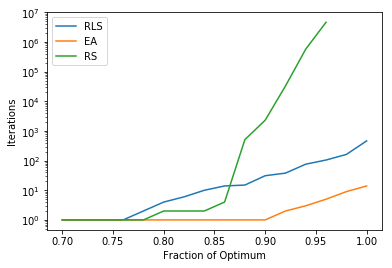

In [24]:
rls =[1, 1, 1, 1, 2, 4, 6, 10, 14, 15, 31, 38, 76, 105, 162, 464]
ea = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 5, 9, 14]
rs = [1, 1, 1, 1, 1, 2, 2, 2, 4, 512, 2314, 33048, 581318, 4685989]
plt.yscale('log')
plt.plot(x, rls, label='RLS')
plt.plot(x, ea, label='EA')
plt.plot([x/100.0 for x in range(70, 97, 2)], rs, label='RS')
plt.legend()
plt.xlabel('Fraction of Optimum')
plt.ylabel('Iterations')
plt.savefig('WT-16_T2.png', format='png', dpi=300)
plt.show()

/home/madness/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4685989, top=4685989
  'bottom=%s, top=%s') % (bottom, top))


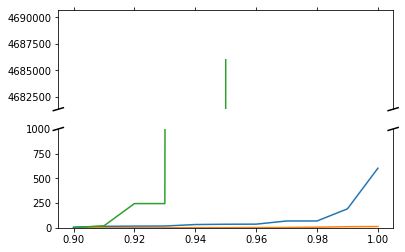

In [26]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ax.plot(x, rls)
ax.plot(x, ea)
ax.plot([x/100.0 for x in range(90, 96)], rs)

ax2.plot(x, rls)
ax2.plot(x, ea)
ax2.plot([x/100.0 for x in range(90, 96)], rs)

ax.set_ylim(4685989, 4685989)  # outliers only
ax2.set_ylim(0, 1000)  # most of the data

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.show()

In [32]:
import pandas as pd
df = pd.read_csv('../../ea-runs.csv', header=None, names=['semester', 'teaming', 'score', 'iterations', 'collisions'])
df.head()

,semester,teaming,score,iterations,collisions
0,WT-15,teaming2,43.829775,19,0
1,WT-15,teaming3,43.829775,33,0
2,WT-15,teaming4,43.829775,44,0
3,ST-16,teaming2,42.166221,14,0
4,ST-16,teaming3,42.166221,22,0


In [37]:
groups = df.groupby(['semester', 'teaming']).mean()
groups

score  iterations  collisions
semester teaming                                    
ST-16    teaming2  42.166221        20.7         0.0
         teaming3  42.166221        41.2         0.0
         teaming4  42.166221        62.2         0.0
ST-17    teaming2  41.542533        60.8         0.0
         teaming3  41.537480       143.2         0.0
         teaming4  41.522458       151.4         0.0
WT-15    teaming2  43.829775        45.5         0.0
         teaming3  43.829775        70.7         0.0
         teaming4  43.829775       105.7         0.0
WT-16    teaming2  45.074729        45.9         0.0
         teaming3  45.074729        67.0         0.0
         teaming4  45.074729        55.6         0.0

In [38]:
import matplotlib.pyplot as plt

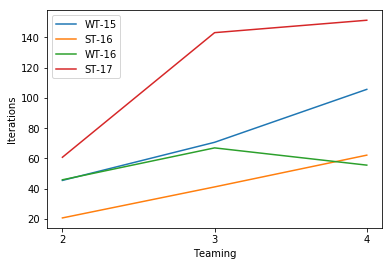

In [53]:
for semester in df['semester'].unique():
    plt.plot([1, 2, 3], groups.loc[semester, 'iterations'].values, label=semester)
plt.legend()
plt.ylabel('Iterations')
plt.xlabel('Teaming')
plt.xticks([1, 2, 3], [x.replace('teaming', '') for x in df['teaming'].unique()])
plt.savefig('EA_Iterations.png', dpi=300)
plt.show()

In [61]:
df_sem = df[df['semester'] == 'ST-17']
df_sem[df_sem['teaming'] == 'teaming4']

,semester,teaming,score,iterations,collisions
11,ST-17,teaming4,41.547518,118,0
23,ST-17,teaming4,41.547518,249,0
68,ST-17,teaming4,41.547518,95,0
70,ST-17,teaming4,41.497676,65,0
71,ST-17,teaming4,41.496983,92,0
75,ST-17,teaming4,41.547518,302,0
116,ST-17,teaming4,41.497676,63,0
117,ST-17,teaming4,41.547518,300,0
118,ST-17,teaming4,41.496983,70,0
119,ST-17,teaming4,41.497676,160,0
